<a href="https://colab.research.google.com/github/maitri-7/DaLab/blob/main/EXP3_HypothesisTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import math
import numpy as np
import pandas as pd
import statistics
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/maitri-7/DaLab/main/Exp2/bodyPerformance.csv')
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [28]:
df.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [29]:
df.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [44]:
df.shape

(13392, 12)

In [30]:
# Since the data is clean, continuing with statistical analysis
numeric_data = df.select_dtypes(exclude='object')
categorical_data = df.select_dtypes(include='object')

In [31]:
df.mean()

age                         36.775106
height_cm                  168.559807
weight_kg                   67.447316
body fat_%                  23.240165
diastolic                   78.796842
systolic                   130.234817
gripForce                   36.963877
sit and bend forward_cm     15.209268
sit-ups counts              39.771224
broad jump_cm              190.129627
dtype: float64

In [32]:
df.mode()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,21.0,M,170.0,70.5,23.1,80.0,120.0,43.1,20.0,45.0,211.0,C
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D


In [33]:
df.median()

age                         32.0
height_cm                  169.2
weight_kg                   67.4
body fat_%                  22.8
diastolic                   79.0
systolic                   130.0
gripForce                   37.9
sit and bend forward_cm     16.2
sit-ups counts              41.0
broad jump_cm              193.0
dtype: float64

In [34]:
for attribute in numeric_data:
  print('Variance(' +attribute+ ')-->   {}' .format(statistics.variance(df[attribute])))

Variance(age)-->   185.6580511106169
Variance(height_cm)-->   71.00729348140638
Variance(weight_kg)-->   142.79452570203424
Variance(body fat_%)-->   52.66178600041373
Variance(diastolic)-->   115.39127511955684
Variance(systolic)-->   216.50042823887298
Variance(gripForce)-->   112.88773559936443
Variance(sit and bend forward_cm)-->   71.51538603861185
Variance(sit-ups counts)-->   203.82411511666297
Variance(broad jump_cm)-->   1589.4574345759268


In [35]:
for attribute in numeric_data:
  print('Standard Deviation(' +attribute+ ')-->   {}' .format(statistics.stdev(df[attribute])))

Standard Deviation(age)-->   13.625639475291312
Standard Deviation(height_cm)-->   8.426582550560244
Standard Deviation(weight_kg)-->   11.949666342707408
Standard Deviation(body fat_%)-->   7.256844079929906
Standard Deviation(diastolic)-->   10.742033099909758
Standard Deviation(systolic)-->   14.713953521704253
Standard Deviation(gripForce)-->   10.624864027335335
Standard Deviation(sit and bend forward_cm)-->   8.456677009240204
Standard Deviation(sit-ups counts)-->   14.276698326877366
Standard Deviation(broad jump_cm)-->   39.86800013263679


In [36]:
df.mad() #Mean absolute deviation
#As we can see, 'broad jump_cm' feature has the highest variability in our data.

age                        11.844362
height_cm                   6.919084
weight_kg                   9.680199
body fat_%                  5.833442
diastolic                   8.651310
systolic                   12.026424
gripForce                   9.068306
sit and bend forward_cm     6.268510
sit-ups counts             11.571289
broad jump_cm              32.726099
dtype: float64

In [37]:
df.skew()
#From the output given below, we can say that the following age,weight_kg,body_fat, gripForce are positively skewed and height_cm,broad jump, sit-ups count are negatively skewed

age                        0.599896
height_cm                 -0.186882
weight_kg                  0.349805
body fat_%                 0.361132
diastolic                 -0.159637
systolic                  -0.048654
gripForce                  0.018456
sit and bend forward_cm    0.785492
sit-ups counts            -0.467830
broad jump_cm             -0.422623
dtype: float64

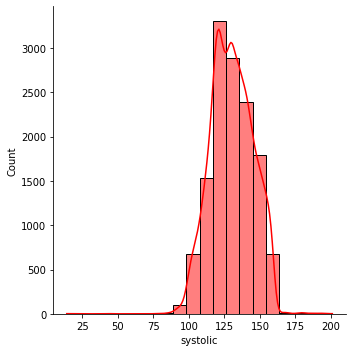

In [38]:
df = df[~(df["systolic"] == 0)]
sns.displot(df["systolic"],color='red',bins=20,kde=True)

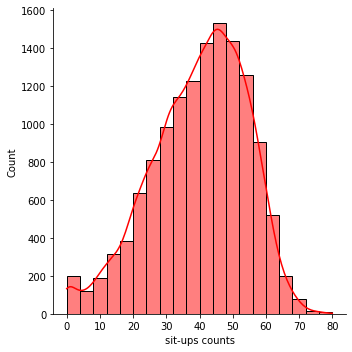

In [39]:
sns.displot(df["sit-ups counts"],color='red',bins=20,kde=True)
#The data is negatively skewed for sit-ups counts

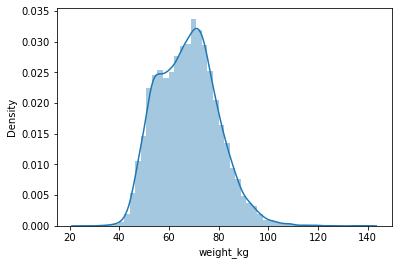

In [40]:
sns.distplot(df['weight_kg'],hist=True,kde=True)

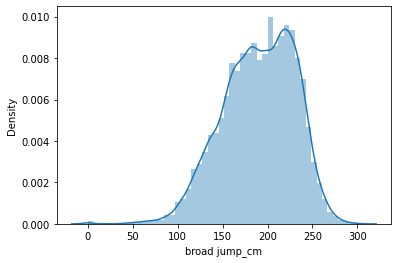

In [41]:
sns.distplot(df['broad jump_cm'],hist=True,kde=True)

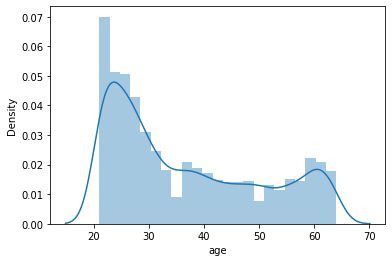

In [42]:
sns.distplot(df['age'],hist=True,kde=True)

In [43]:
df_test = df.head(20)

**T-Test**


---



**Null Hypothesis:** The sit-up counts mean is 40

**Alternative Hypothesis:** The sit-up counts mean is != 40 (So it is two tailed)

In [45]:
from scipy import stats

t_value,p_value=stats.ttest_1samp(df_test['sit-ups counts'],40)
two_tailed_p_value=float("{:.6f}".format(p_value))
print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%two_tailed_p_value)
alpha = 0.05

if two_tailed_p_value<=alpha:
  print('Null Hypothesis is rejected and the mean for sit-ups counts is either greater than or less than 40')

else:
  print('We do not reject the Null Hypothesis and the mean is 40')

Test statistic is 0.806497
p-value for two tailed test is 0.429936
We do not reject the Null Hypothesis and the mean is 40


We can confirm our results by the data provided to us by df.describe() that says that the population mean for sit-ups count is approximately 40 which makes our hypothesis correct to a great extent.

**Z Test**


---





**Null Hypothesis:** The sit-up counts mean is 40

**Alternative Hypothesis:** The sit-up counts mean is != 40 (So it is two tailed)

In [47]:
from statsmodels.stats.weightstats import ztest
ztest_Score, p_value= ztest(df_test['sit-ups counts'],value = 40,alternative='two-sided')

In [49]:
print('p-value for two tailed test is %f'%two_tailed_p_value)
if(p_value <  alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject NUll Hypothesis")

p-value for two tailed test is 0.429936
Fail to Reject NUll Hypothesis


**Chi Square Test**

---



In [57]:
import math
df['broad jump_cm'].var()

1589.2878489283291

**Null Hypothesis:** Variance of population is 1590

**Alternate Hypothesis:** Variance of population is not 1590

In [52]:
alpha = float("{:.6f}".format(0.05/2))
dof = df_test.shape[0] - 1

In [53]:
rejectionRegion = scipy.stats.chi2.ppf(1 - alpha,dof)
rejectionRegion

32.85232686172969

In [58]:
n = df_test.shape[0]
Variance = df['broad jump_cm'].var()
StandDev = math.sqrt( df_test['broad jump_cm'].var())
chisquareval = (float)((n-1)*StandDev*StandDev)

In [59]:
chisquareval = chisquareval/Variance
chisquareval

21.437872329404858

In [60]:
if chisquareval <= rejectionRegion:
  print("Cannot reject the NULL hypothesis")
else:
  print("Reject the NULL hypothesis")

Cannot reject the NULL hypothesis


**Anova Test**

---



**Null hypothesis:** Groups means are equal (no variation in means of groups) H0: μ1=μ2=…=μp

**Alternative hypothesis:** Group means are not equal.

In [69]:
data = df_test[["diastolic","systolic"]]
anovaData = pd.DataFrame(columns = ['Exercises', 'Score'])
for (columnName, columnData) in data.iteritems():
  for score in columnData.values:
    anovaData = anovaData.append({'Exercises':columnName,'Score':int(score)},ignore_index = True)

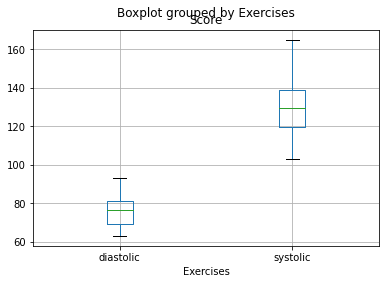

In [75]:
anovaData.boxplot('Score',by='Exercises')

In [76]:
anovaData['Score'] = pd.to_numeric(anovaData['Score'])
anovaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Exercises  40 non-null     object
 1   Score      40 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 768.0+ bytes


In [77]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [73]:
new = ols('Score ~ Exercises',data = anovaData).fit()
an  = sm.stats.anova_lm(new,typ=2)

In [74]:
an

,sum_sq,df,F,PR(>F)
Exercises,30085.225,1.0,167.936857,1.606947e-15
Residual,6807.550,38.0,NaN,NaN


As we can see that our P-value is less than the F-score this means that the NULL hypothesis will be rejected and we can conclude that the group means are not same.